<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/EN/S01_Intro/SCA_vibe_coding_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the following prompt to generate code


"**General instructions**: Generate Python code to perform the task below. Please organize the code in a simple way with comments to describe every major step and, if possible, each line of code. Clearly separate the following code blocks when applicable (some code blocks can be omitted for simplicity) for loading libraries, inputs and data loading, data transformation, main calculation and modeling processes, outputs. If possible, please use mainly basic Python functionalities.

**Context**: I am a supply chain manager deciding how many Christmas trees to order.

**Inputs**:
*   Unit Cost: \$20
*   Selling Price: \$60
*   Unsold trees: \$0 value
*   Demand is normally distributed (Mean = 100, Std Dev = 20)
*   Simulation runs: 10000 scenarios

**Task**: Write a Python script to perform a Monte Carlo Simulation to find the best order quantity through the following steps.

**Steps**:
*   Step 1: Generate 10000 random demand scenarios using Normal distribution
*   Step 2: Test a range of potential Order Quantities from 50 to 150.
*   Step 3: For each Order Quantity, calculate the expected profit across all 10000 scenarios.
*   Step 4: Find the optimal Order Quantity that maximizes the average profit.

**Outputs**:
*   Print the Optimal Order Quantity and its Expected Profit.
*   Plot the results using (1) a line chart with 'Order Quantity' on the x-axis and 'Expected Profit' on the y-axis. Mark the peak profit with a red dot. and (2) a histogram showing the distribution of profit for the Optimal Order Quantity across all the scenarios.
"


# Task
Perform a Monte Carlo simulation to find the optimal order quantity for Christmas trees by simulating 10000 demand scenarios, testing order quantities from 50 to 150, calculating expected profit for each, and then plotting the results.

## import_libraries

### Subtask:
Import necessary libraries for numerical operations and plotting.


**Reasoning**:
To perform numerical operations and generate plots as required by the task, I will import the `numpy` library for numerical computations and `matplotlib.pyplot` for visualization.



In [ ]:
# Import necessary libraries for numerical operations and plotting
# Import numpy for numerical operations, especially for generating random numbers
import numpy as np

# Import matplotlib.pyplot for creating plots and visualizations
import matplotlib.pyplot as plt

print("Libraries numpy and matplotlib.pyplot imported successfully.")

Libraries numpy and matplotlib.pyplot imported successfully.


**Reasoning**:
The previous step successfully imported the required libraries. Now, I will define all the input parameters provided in the problem description, such as unit cost, selling price, demand distribution parameters, and the number of simulation runs, to set up the Monte Carlo simulation.



In [ ]:
# Inputs and Data Loading
# Define the input parameters for the simulation
unit_cost = 20  # Cost to purchase one Christmas tree
selling_price = 60  # Price at which one Christmas tree is sold
unsold_value = 0  # Value of an unsold Christmas tree

demand_mean = 100  # Mean of the normally distributed demand
demand_std_dev = 20  # Standard deviation of the normally distributed demand
num_scenarios = 10000  # Number of simulation runs/scenarios

print(f"Input parameters defined:\nUnit Cost: ${unit_cost}\nSelling Price: ${selling_price}\nUnsold Value: ${unsold_value}\nDemand Mean: {demand_mean}\nDemand Std Dev: {demand_std_dev}\nNumber of Scenarios: {num_scenarios}")

Input parameters defined:
Unit Cost: $20
Selling Price: $60
Unsold Value: $0
Demand Mean: 100
Demand Std Dev: 20
Number of Scenarios: 10000


**Reasoning**:
With the input parameters defined, the next step is to generate the 10000 random demand scenarios using a normal distribution, as specified in 'Step 1' of the task.



In [ ]:
import numpy as np

# Data Transformation and Simulation
# Step 1: Generate random demand scenarios
# Generate 10000 random demand scenarios using a Normal distribution with the defined mean and standard deviation.
demand_scenarios = np.random.normal(demand_mean, demand_std_dev, num_scenarios)
# Ensure demand is not negative, as demand cannot be less than zero.
demand_scenarios = np.maximum(0, demand_scenarios)

print(f"Generated {len(demand_scenarios)} demand scenarios. First 5 scenarios: {demand_scenarios[:5].round(2)}")

Generated 10000 demand scenarios. First 5 scenarios: [ 90.46 109.13  98.56 117.52 127.71]


**Reasoning**:
Now that the demand scenarios are generated, the next step is to define the range of potential order quantities to test, as outlined in 'Step 2' of the task.



In [ ]:
# Step 2: Define a range of potential Order Quantities to test
# Create a list of order quantities to evaluate, ranging from 50 to 150 (inclusive).
order_quantities = list(range(50, 151))

print(f"Defined a range of {len(order_quantities)} order quantities from {order_quantities[0]} to {order_quantities[-1]}.")

Defined a range of 101 order quantities from 50 to 150.


**Reasoning**:
With the demand scenarios and the range of order quantities defined, the next step is to calculate the expected profit for each order quantity across all simulated demand scenarios, as specified in 'Step 3' of the task. This involves defining a function to calculate profit for a single scenario and then applying it for all order quantities and demand scenarios.



In [ ]:
# Step 3: For each Order Quantity, calculate the expected profit across all 10000 scenarios.
# Initialize a list to store the average profits for each order quantity.
average_profits = []

# Loop through each potential order quantity.
for order_quantity in order_quantities:
    # Initialize a list to store profits for the current order quantity across all scenarios.
    profits_for_quantity = []
    # Loop through each demand scenario to calculate profit.
    for actual_demand in demand_scenarios:
        # Calculate the number of trees sold. It cannot exceed the ordered quantity or the actual demand.
        sold_trees = min(order_quantity, actual_demand)
        # Calculate the number of unsold trees.
        unsold_trees = max(0, order_quantity - actual_demand)

        # Calculate revenue from sold trees.
        revenue = sold_trees * selling_price
        # Calculate cost of purchased trees.
        costs = order_quantity * unit_cost
        # Calculate value from unsold trees (if any, though in this case it's 0).
        salvage_value = unsold_trees * unsold_value

        # Calculate the total profit for this scenario.
        profit = revenue - costs + salvage_value
        # Add the calculated profit to the list for the current order quantity.
        profits_for_quantity.append(profit)

    # Calculate the average profit for the current order quantity across all scenarios.
    avg_profit = np.mean(profits_for_quantity)
    # Store the average profit.
    average_profits.append(avg_profit)

print(f"Calculated average profits for {len(average_profits)} order quantities.")
print(f"Average profit for ordering {order_quantities[0]} trees: ${average_profits[0]:.2f}")
print(f"Average profit for ordering {order_quantities[-1]} trees: ${average_profits[-1]:.2f}")

Calculated average profits for 101 order quantities.
Average profit for ordering 50 trees: $1997.36
Average profit for ordering 150 trees: $3002.22


**Reasoning**:
Now that the average profits for each order quantity have been calculated, the next step is to find the optimal order quantity that maximizes this average profit, as specified in 'Step 4' of the task.



In [ ]:
# Step 4: Find the optimal Order Quantity that maximizes the average profit.
# Find the index of the maximum average profit.
optimal_index = np.argmax(average_profits)

# Get the optimal order quantity using the optimal index.
optimal_order_quantity = order_quantities[optimal_index]

# Get the peak profit corresponding to the optimal order quantity.
peak_profit = average_profits[optimal_index]

# Get all profits for the optimal order quantity to use in the histogram later.
# This requires recalculating profits for the optimal quantity across all scenarios.
profits_at_optimal_quantity = []
for actual_demand in demand_scenarios:
    sold_trees = min(optimal_order_quantity, actual_demand)
    unsold_trees = max(0, optimal_order_quantity - actual_demand)
    revenue = sold_trees * selling_price
    costs = optimal_order_quantity * unit_cost
    salvage_value = unsold_trees * unsold_value
    profit = revenue - costs + salvage_value
    profits_at_optimal_quantity.append(profit)

print(f"Optimal Order Quantity: {optimal_order_quantity}")
print(f"Expected Profit at Optimal Quantity: ${peak_profit:.2f}")

Optimal Order Quantity: 109
Expected Profit at Optimal Quantity: $3566.58


**Reasoning**:
With the optimal order quantity and its corresponding profit identified, the final step is to visualize the results as requested in the task. This involves creating a line chart of expected profit vs. order quantity and a histogram of profits for the optimal order quantity.



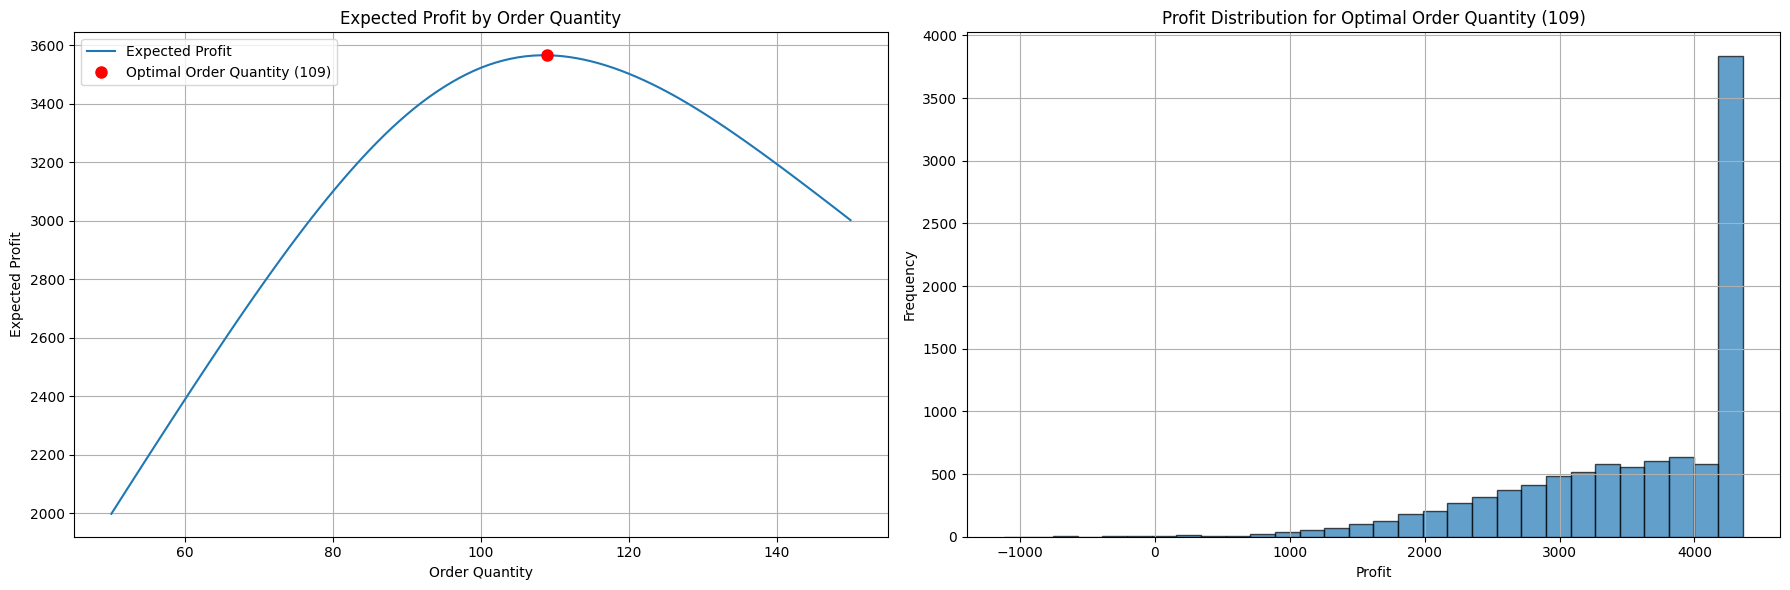

Plots generated successfully: Expected Profit vs. Order Quantity and Profit Distribution for Optimal Order Quantity.


In [ ]:
# Outputs: Plot the results
# Create a figure with two subplots side-by-side for the visualizations.
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Line chart of Expected Profit by Order Quantity
# Plot all order quantities against their average profits.
axes[0].plot(order_quantities, average_profits, label='Expected Profit')
# Mark the optimal order quantity with a red dot.
axes[0].plot(optimal_order_quantity, peak_profit, 'ro', markersize=8, label=f'Optimal Order Quantity ({optimal_order_quantity})')
# Add labels and title for clarity.
axes[0].set_xlabel('Order Quantity')
axes[0].set_ylabel('Expected Profit')
axes[0].set_title('Expected Profit by Order Quantity')
axes[0].grid(True) # Add a grid for better readability.
axes[0].legend() # Display the legend.

# Plot 2: Histogram of Profit Distribution for Optimal Order Quantity
# Plot a histogram of the profits generated specifically for the optimal order quantity.
axes[1].hist(profits_at_optimal_quantity, bins=30, edgecolor='black', alpha=0.7)
# Add labels and title for clarity.
axes[1].set_xlabel('Profit')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Profit Distribution for Optimal Order Quantity ({optimal_order_quantity})')
axes[1].grid(True) # Add a grid for better readability.

# Adjust layout to prevent overlap and display the plots.
plt.tight_layout()
plt.show()

print("Plots generated successfully: Expected Profit vs. Order Quantity and Profit Distribution for Optimal Order Quantity.")

## Summary:

### Q&A
**What is the optimal order quantity for Christmas trees?**
The optimal order quantity is 109 Christmas trees.

**What is the expected profit at the optimal order quantity?**
The expected profit at the optimal order quantity (109 trees) is \$3566.58.

### Data Analysis Key Findings
*   Input parameters for the simulation were set as follows: unit cost \$20, selling price \$60, and unsold value \$0. Demand was normally distributed with a mean of 100 and a standard deviation of 20.
*   A Monte Carlo simulation was performed by generating 10,000 random demand scenarios.
*   The simulation evaluated order quantities ranging from 50 to 150 Christmas trees.
*   The optimal order quantity was determined to be 109 trees, as it yielded the highest expected profit of \$3566.58 across all simulated scenarios.
*   Plots were generated to visualize the relationship between expected profit and order quantity, clearly indicating the optimal point, and to show the distribution of profits when ordering the optimal quantity.

### Insights or Next Steps
*   Based on the simulation, ordering 109 Christmas trees is recommended to maximize expected profit under the given demand distribution and cost structure.
*   Consider conducting sensitivity analysis to understand how changes in unit cost, selling price, or demand parameters (mean, standard deviation) might affect the optimal order quantity and expected profit.
